In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arrawdata/ARrawdata/p15_6.tif
/kaggle/input/arrawdata/ARrawdata/p19_1.tif
/kaggle/input/arrawdata/ARrawdata/p60_10.tif
/kaggle/input/arrawdata/ARrawdata/p52_13.tif
/kaggle/input/arrawdata/ARrawdata/p58_14.tif
/kaggle/input/arrawdata/ARrawdata/p32_4.tif
/kaggle/input/arrawdata/ARrawdata/p30_7.tif
/kaggle/input/arrawdata/ARrawdata/p15_1.tif
/kaggle/input/arrawdata/ARrawdata/p4_4.tif
/kaggle/input/arrawdata/ARrawdata/p44_12.tif
/kaggle/input/arrawdata/ARrawdata/p50_12.tif
/kaggle/input/arrawdata/ARrawdata/p55_9.tif
/kaggle/input/arrawdata/ARrawdata/p57_10.tif
/kaggle/input/arrawdata/ARrawdata/p10_8.tif
/kaggle/input/arrawdata/ARrawdata/p47_4.tif
/kaggle/input/arrawdata/ARrawdata/p69_12.tif
/kaggle/input/arrawdata/ARrawdata/p38_10.tif
/kaggle/input/arrawdata/ARrawdata/p26_5.tif
/kaggle/input/arrawdata/ARrawdata/p9_6.tif
/kaggle/input/arrawdata/ARrawdata/p53_10.tif
/kaggle/input/arrawdata/ARrawdata/p18_6.tif
/kaggle/input/arrawdata/ARrawdata/p50_3.tif
/kaggle/input/arrawdata/A

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
#from keras_vggface.vggface import VGGFace
#from keras_vggface.utils import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

2024-07-03 10:07:03.062534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 10:07:03.062650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 10:07:03.185479: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dataset_path = "/kaggle/input/arrawdata/ARrawdata"

images = []
labels = []

for file in os.listdir(dataset_path):
    if file.endswith(".tif"):
        label = int(file.split('_')[0][1:])
        img = load_img(os.path.join(dataset_path, file), color_mode="grayscale", target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.repeat(img_array, 3, axis=2)
        images.append(img_array)
        labels.append(label)


images = np.array(images)
labels = np.array(labels)

In [4]:
images[0]

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[143., 143., 143.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[135., 135., 135.],
        [255., 255., 255.],
        [253., 253., 253.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[148., 148., 148.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[147., 147., 147.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[149., 149., 149.],
        [255., 255., 255.],
        [255., 2

In [5]:
images = images / 255.0

In [6]:
images[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.56078434, 0.56078434, 0.56078434],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.5294118 , 0.5294118 , 0.5294118 ],
        [1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.5803922 , 0.5803922 , 0.5803922 ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [7]:
print(images.shape)
print(labels.shape)

(1050, 224, 224, 3)
(1050,)


In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [9]:
X_train.shape

(735, 224, 224, 3)

In [10]:
X_val.shape

(157, 224, 224, 3)

In [11]:
X_test.shape

(158, 224, 224, 3)

In [12]:
import matplotlib.pyplot as plt

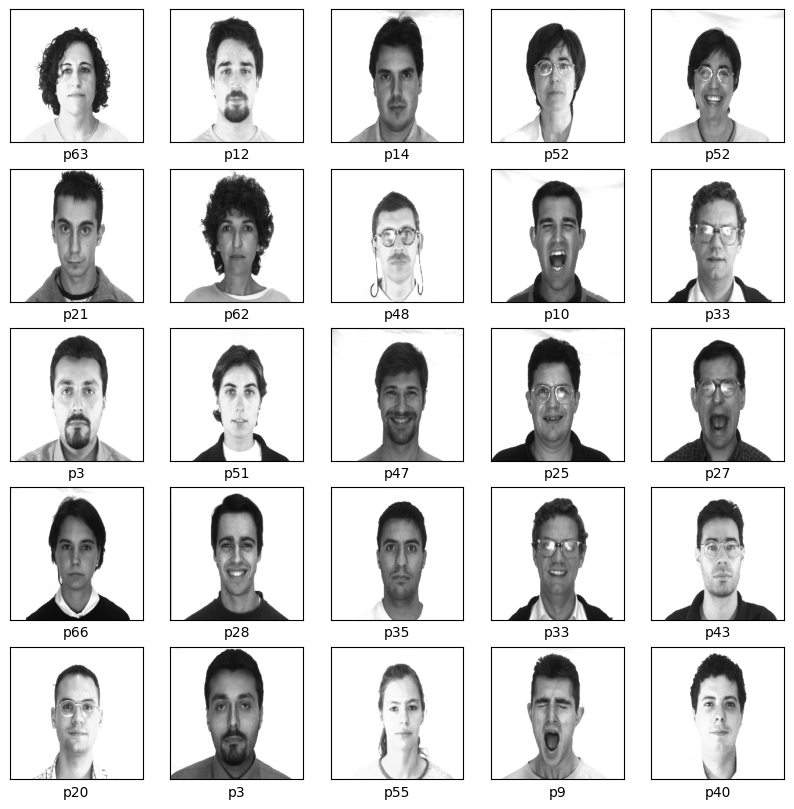

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap='gray')
    plt.xlabel(f"p{y_train[i]}")
plt.show()

In [14]:
y_train[0]

63

In [15]:
y_train = to_categorical(y_train-1, 75)
y_val = to_categorical(y_val-1, 75)
y_test = to_categorical(y_test-1, 75)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [17]:
y_train.shape

(735, 75)

In [18]:
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(75, activation='softmax')(x) 

model = Model(inputs=base_model.input, outputs=x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │        38,475 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,598,731 (105.28 MB)

 Trainable params: 27,598,731 (105.28 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


2024-07-03 10:07:34.622298: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-07-03 10:07:34.622349: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-07-03 10:07:34.622358: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-07-03 10:07:34.622367: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-07-03 10:07:34.622375: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.25159, expected 5.47629
2024-07-03 10:07:34.622382: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.43964, expected 4.66434
2024-07-03 10:07:34.622390: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.54333, expected 5.76803
2024-07-03 10:07:34.622398: E external/local_xla/xla/se

22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.0423 - loss: 4.3548

2024-07-03 10:08:15.035377: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100352: 3.62212, expected 2.70127
2024-07-03 10:08:15.035436: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100353: 5.31563, expected 4.39477
2024-07-03 10:08:15.035445: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100354: 5.43093, expected 4.51007
2024-07-03 10:08:15.035454: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100355: 5.35723, expected 4.43638
2024-07-03 10:08:15.035461: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100356: 5.06878, expected 4.14793
2024-07-03 10:08:15.035469: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100357: 5.791, expected 4.87014
2024-07-03 10:08:15.035477: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100358: 5.23388, expected 4.31303
2024-07-03 10:08:15.03

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0440 - loss: 4.3483   

2024-07-03 10:08:48.675928: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.5554, expected 3.07265
2024-07-03 10:08:48.675983: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.13778, expected 2.65504
2024-07-03 10:08:48.675993: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 3.34289, expected 2.86015
2024-07-03 10:08:48.676002: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 181: 3.72137, expected 3.23862
2024-07-03 10:08:48.676023: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 198: 3.32536, expected 2.84261
2024-07-03 10:08:48.676031: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 199: 3.81774, expected 3.335
2024-07-03 10:08:48.676039: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 223: 2.84685, expected 2.36411
2024-07-03 10:08:48.676063: E external/local_xla

23/23 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.0455 - loss: 4.3423 - val_accuracy: 0.2739 - val_loss: 3.7233
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.4320 - loss: 3.3111 - val_accuracy: 0.6688 - val_loss: 2.1533
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.8462 - loss: 1.3526 - val_accuracy: 0.9236 - val_loss: 0.3908
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.9921 - loss: 0.1007 - val_accuracy: 0.9873 - val_loss: 0.0946
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 0.9873 - val_loss: 0.0751
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9873 - val_loss: 0.0489
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9873 - val_loss: 0.0395
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 1.0000 - loss: 8.8783e-04 - val_accuracy: 0.9873 - va

In [22]:
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Train Loss: {train_loss:.4f}") 
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}") 
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}") 

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9837 - loss: 0.0430

2024-07-03 10:09:47.369909: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50176: 5.1593, expected 4.2307
2024-07-03 10:09:47.369971: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50177: 5.27465, expected 4.34605
2024-07-03 10:09:47.369985: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50178: 6.22507, expected 5.29647
2024-07-03 10:09:47.369994: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50179: 6.11698, expected 5.18838
2024-07-03 10:09:47.370004: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50180: 5.57882, expected 4.65022
2024-07-03 10:09:47.370025: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50181: 5.26032, expected 4.33172
2024-07-03 10:09:47.370038: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50182: 5.05778, expected 4.12918
2024-07-03 10:09:47.370058: E

5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.9870 - loss: 0.0405
Train Accuracy: 100.00%
Train Loss: 0.0006
Validation Accuracy: 98.73%
Validation Loss: 0.0314
Test Accuracy: 99.37%
Test Loss: 0.0353
